In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

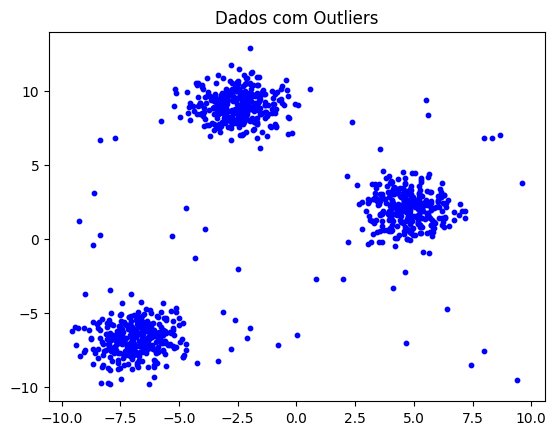

In [8]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=1000, centers=3, cluster_std=1.0, random_state=42)
outliers = np.random.uniform(low=-10, high=10, size=(50, 2))
X_with_outliers = np.vstack([X, outliers])
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], color='b', s=10)
plt.title('Dados com Outliers')
plt.show()

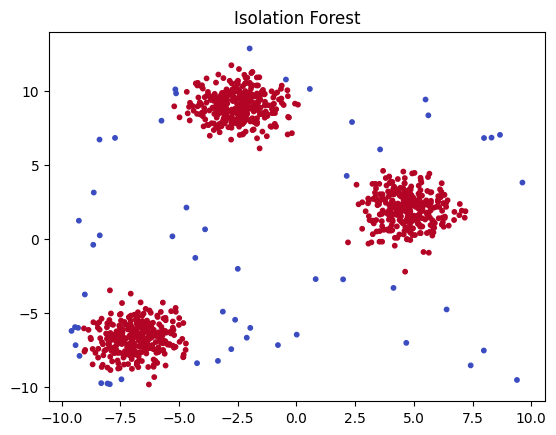

In [9]:

iso_forest = IsolationForest(contamination=0.05)
y_pred_iso = iso_forest.fit_predict(X_with_outliers)
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=y_pred_iso, cmap='coolwarm', s=10)
plt.title('Isolation Forest')
plt.show()

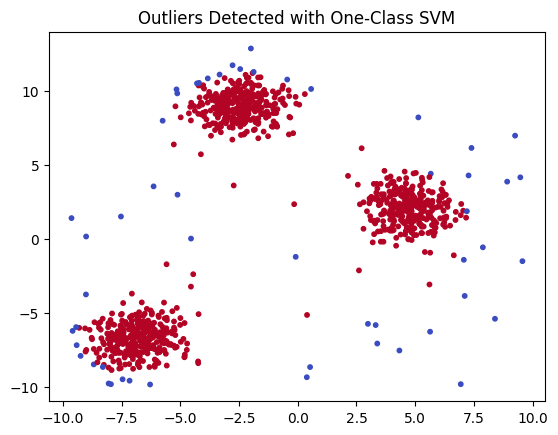

In [5]:
one_class_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')
y_pred_svm = one_class_svm.fit_predict(X_with_outliers)
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=y_pred_svm, cmap='coolwarm', s=10)
plt.title('One-Class SVM')
plt.show()

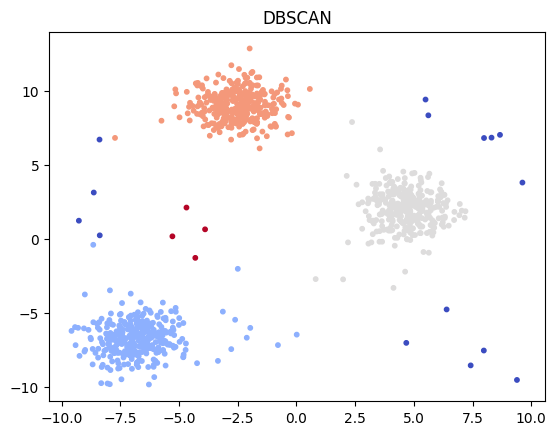

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_with_outliers)
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X_scaled)
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=y_pred_dbscan, cmap='coolwarm', s=10)
plt.title('DBSCAN')
plt.show()

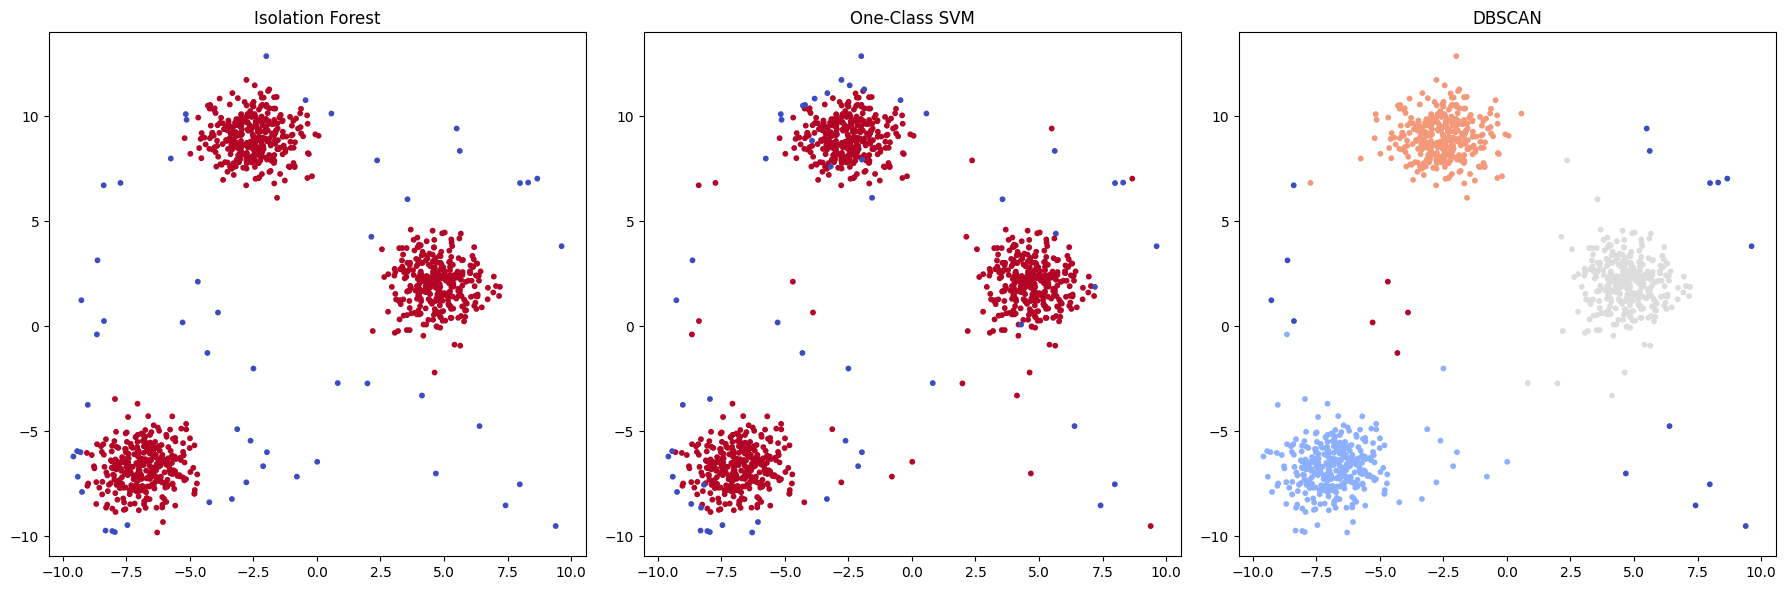

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=y_pred_iso, cmap='coolwarm', s=10)
axes[0].set_title('Isolation Forest')
axes[1].scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=y_pred_svm, cmap='coolwarm', s=10)
axes[1].set_title('One-Class SVM')
axes[2].scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=y_pred_dbscan, cmap='coolwarm', s=10)
axes[2].set_title('DBSCAN')
plt.tight_layout()
plt.show()